# # Feature Selection

Imports and Visualization parameters

In [33]:
import pandas as pd
import numpy as np

# import libraries for visualization
%matplotlib inline
import matplotlib.pyplot as plt
import pylab

#import libraries for features decomposition
import sklearn as sk
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA

#Visualization param
pd.options.display.max_columns = None
pd.options.display.max_rows = None

Actually importing the data

In [34]:
#import data
df = pd.read_csv('../../Data/NBA-data-With-Positions.csv')
print "(rows,cols) =",df.shape
df.head(5)

(rows,cols) = (476, 30)


,Unnamed: 0,Player,TEAM,AGE,GP,W,L,MIN,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,TOV,STL,BLK,PF,DD2,TD3,PTS,+/-,PosicAbbrev
0,0,Aaron Brooks,CHI,31,69,36,33,16.1,2.7,6.8,40.1,1.0,2.7,35.7,0.7,0.9,76.6,0.3,1.2,1.5,2.6,1.2,0.4,0.1,1.9,0,0,7.1,-0.1,PG
1,1,Aaron Gordon,ORL,20,78,32,46,23.9,3.5,7.4,47.3,0.5,1.8,29.6,1.7,2.5,66.8,2.0,4.5,6.5,1.6,0.8,0.8,0.7,2.0,12,0,9.2,-1.0,PF
2,2,Aaron Harrison,CHA,21,21,15,6,4.4,0.2,0.9,26.3,0.1,0.5,30.0,0.2,0.6,41.7,0.2,0.5,0.7,0.1,0.2,0.3,0.0,0.5,0,0,0.9,-0.3,SG
3,3,Adreian Payne,MIN,25,52,18,34,9.3,1.0,2.8,36.6,0.2,0.6,28.1,0.3,0.5,65.4,0.4,1.8,2.1,0.6,0.7,0.3,0.2,1.5,0,0,2.5,-2.3,PF
4,4,Al Horford,ATL,30,82,48,34,32.1,6.5,12.8,50.5,1.1,3.1,34.4,1.3,1.6,79.8,1.8,5.5,7.3,3.2,1.3,0.8,1.5,2.0,17,0,15.2,2.8,C


In [35]:
dict = {' PG': 1, ' PF': 2, ' SG' : 3, ' SF' : 4, ' C' : 5}
invdict = {v: k for k, v in dict.iteritems()}

position_labels = [dict[x] for x in df['PosicAbbrev']]
df_numVar = df.select_dtypes(include=['number']).drop('Unnamed: 0',1)
df_numVar.head()

,AGE,GP,W,L,MIN,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,TOV,STL,BLK,PF,DD2,TD3,PTS,+/-
0,31,69,36,33,16.1,2.7,6.8,40.1,1.0,2.7,35.7,0.7,0.9,76.6,0.3,1.2,1.5,2.6,1.2,0.4,0.1,1.9,0,0,7.1,-0.1
1,20,78,32,46,23.9,3.5,7.4,47.3,0.5,1.8,29.6,1.7,2.5,66.8,2.0,4.5,6.5,1.6,0.8,0.8,0.7,2.0,12,0,9.2,-1.0
2,21,21,15,6,4.4,0.2,0.9,26.3,0.1,0.5,30.0,0.2,0.6,41.7,0.2,0.5,0.7,0.1,0.2,0.3,0.0,0.5,0,0,0.9,-0.3
3,25,52,18,34,9.3,1.0,2.8,36.6,0.2,0.6,28.1,0.3,0.5,65.4,0.4,1.8,2.1,0.6,0.7,0.3,0.2,1.5,0,0,2.5,-2.3
4,30,82,48,34,32.1,6.5,12.8,50.5,1.1,3.1,34.4,1.3,1.6,79.8,1.8,5.5,7.3,3.2,1.3,0.8,1.5,2.0,17,0,15.2,2.8


Feature Selection Methods

VarianceThreshold (this method will be used before all other ones)

In [36]:
#from sklearn.feature_selection import VarianceThreshold
#sel = VarianceThreshold(threshold=(.5 * (1 - .5)))
#newdf = sel.fit_transform(df_numVar)

This method was not worth it, as it we are using floats and it compares exact values

Another relevant thing we can do is limit our algorithm to the players that played more than a certain number of minutes per game (this made results worse, so I will comment it, maybe because my threshold was too big)

In [37]:
#withoutplayers = df_numVar[df_numVar["MIN"]>10]
#df_numVar = withoutplayers
#newposlabels = list()
#aux = df_numVar["MIN"]>10
#for i in range(len(position_labels)):
#    if aux[i] == True:
#        newposlabels.append(position_labels[i])
#newposlabels = np.array(newposlabels) #saving position labels for chosen players in new array

Now I will just transform my data into matricial data

In [38]:
newdf = df_numVar.as_matrix()

Now we will try to use the most classical feature selection methods for unsupervised learning

1 - Laplacian Score

In [39]:
X = newdf

from skfeature.utility import construct_W
kwargs_W = {"metric":"euclidean","neighbor_mode":"knn","weight_mode":"heat_kernel","k":5,'t':1}
W = construct_W.construct_W(X, **kwargs_W)

from skfeature.function.similarity_based import lap_score
score = lap_score.lap_score(X, W=W)
print score

idx = lap_score.feature_ranking(score)
print idx

num_fea = 7
selected_features = df_numVar.columns[idx[0:num_fea]]
print selected_features

df_final = newdf[:,idx[0:num_fea]]

[  6.80346846e-09   9.93275462e-11   1.23519528e-10   4.62514027e-10
   3.87541221e-10   2.16717755e-11   3.84765220e-10   7.13824555e-11
   3.45057316e-13   2.81966672e-11   4.92272889e-12   8.01997579e-10
   1.12866172e-09   1.53157598e-10   5.09693088e-09   3.60272256e-09
   4.92164354e-09   7.00100644e-10   4.99454478e-09   1.23914258e-08
   6.77652390e-09   1.51168902e-08   9.40741929e-11   0.00000000e+00
   6.11444229e-12   2.86645672e-08]
[23  8 10 24  5  9  7 22  1  2 13  6  4  3 17 11 12 15 16 18 14 20  0 19 21
 25]
Index([u'TD3', u'3PM', u'3P%', u'PTS', u'FGM', u'3PA', u'FG%'], dtype='object')


1 - Evaluating lap_score (esse usa um tipo de clusterização pra calcular essas paradas na real, acho que ele assume o kmeans), talvez seja bom pra sua parte fiuzinha

In [40]:
from skfeature.utility import unsupervised_evaluation
import numpy as np
num_cluster = len(np.unique(position_labels))
#nmi,acc=unsupervised_evaluation.evaluation(X_selected=selected_features,n_clusters=num_cluster,y=position_labels)
#print nmi
#print acc

Plotting results with PCA to compare with real positions

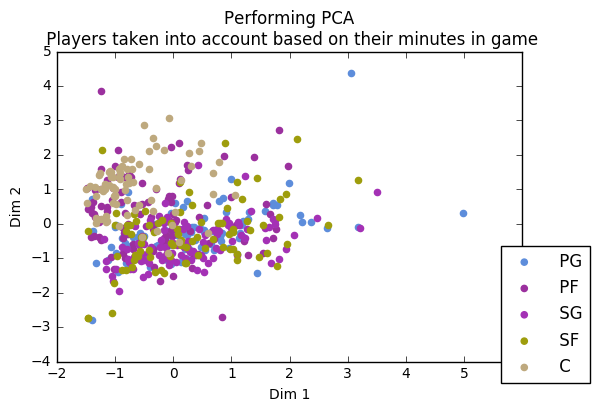

In [41]:
df_scaled = sk.preprocessing.scale(df_final)
pca = sk.decomposition.PCA(n_components=2, whiten=True)
df_red = pca.fit_transform(df_scaled)

statesN = [1,2,3,4,5]
states = [invdict[x] for x in statesN]
states

import matplotlib.patches as mpatches
pylab.title("Performing PCA\n Players taken into account based on their minutes in game")
pylab.xlabel("Dim 1")
pylab.ylabel("Dim 2")

states = [invdict[x] for x in [1,2,3,4,5]]
for i,l in enumerate(states):
    x = []
    y = []
    for j,_ in enumerate(df_red[:, 0]):
        if position_labels[j] == i+1:
            x.append(df_red[j,0])
            y.append(df_red[j,1])
    pylab.scatter(x,y,label=l,color = np.random.rand(3,1) )

pylab.legend(loc='upper center', bbox_to_anchor=(1.05, .4) ,scatterpoints = 1)
pylab.show()

2 - SPEC

In [42]:
X = newdf

from skfeature.utility import construct_W
kwargs_W = {"metric":"euclidean","neighbor_mode":"knn","weight_mode":"heat_kernel","k":5,'t':1}
W = construct_W.construct_W(X, **kwargs_W)

from skfeature.function.similarity_based import SPEC
score = SPEC.spec(X, W=W)
print score

idx = SPEC.feature_ranking(score)
print idx

num_fea = 7
selected_features = df_numVar.columns[idx[0:num_fea]]
print selected_features

df_final = newdf[:,idx[0:num_fea]]

[  6.80347008e-09   9.93283191e-11   1.23519740e-10   4.62514014e-10
   3.87540474e-10   2.16719732e-11   3.84764976e-10   7.13789078e-11
   3.44926540e-13   2.81967299e-11   4.92250195e-12   8.01997781e-10
   1.12866183e-09   1.53158327e-10   5.09693126e-09   3.60272288e-09
   4.92164364e-09   7.00100629e-10   4.99454499e-09   1.23914254e-08
   6.77652414e-09   1.51168893e-08   9.40741989e-11  -6.67061507e-26
   6.11464989e-12   2.86645669e-08]
[25 21 19  0 20 14 18 16 15 12 11 17  3  4  6 13  2  1 22  7  9  5 24 10  8
 23]
Index([u'+/-', u'PF', u'STL', u'AGE', u'BLK', u'OREB', u'TOV'], dtype='object')


Plotting with PCA to compare with real postions

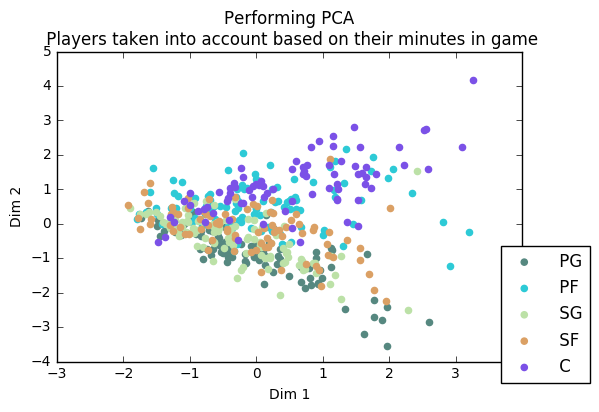

In [43]:
df_scaled = sk.preprocessing.scale(df_final)
pca = sk.decomposition.PCA(n_components=2, whiten=True)
df_red = pca.fit_transform(df_scaled)

statesN = [1,2,3,4,5]
states = [invdict[x] for x in statesN]
states

import matplotlib.patches as mpatches
pylab.title("Performing PCA\n Players taken into account based on their minutes in game")
pylab.xlabel("Dim 1")
pylab.ylabel("Dim 2")
#pylab.scatter(df_red[:, 0], df_red[:, 1], c=position_labels)

states = [invdict[x] for x in [1,2,3,4,5]]
for i,l in enumerate(states):
    x = []
    y = []
    for j,_ in enumerate(df_red[:, 0]):
        if position_labels[j] == i+1:
            x.append(df_red[j,0])
            y.append(df_red[j,1])
    pylab.scatter(x,y,label=l,color = np.random.rand(3,1) )

pylab.legend(loc='upper center', bbox_to_anchor=(1.05, .4) ,scatterpoints = 1)
pylab.show()

3 - MCFS

In [44]:
X = newdf

n_features = 7
from skfeature.utility import construct_W
kwargs_W = {"metric":"euclidean","neighbor_mode":"knn","weight_mode":"heat_kernel","k":5,'t':1}
W = construct_W.construct_W(X, **kwargs_W)

from skfeature.function.sparse_learning_based import MCFS
features_weight = MCFS.mcfs(X, n_features, W=W)
score = MCFS.feature_ranking(features_weight)
print score

num_fea = 7
selected_features = df_numVar.columns[score[0:num_fea]]
print selected_features

df_final = newdf[:,idx[0:num_fea]]

[ 8 17  9 12 22  0 21  7 24 23  1  2  3  4  5  6 19 18 10 11 13 14 15 16 20
 25]
Index([u'3PM', u'AST', u'3PA', u'FTA', u'DD2', u'AGE', u'PF'], dtype='object')


Plotting with PCA to compare with real postions

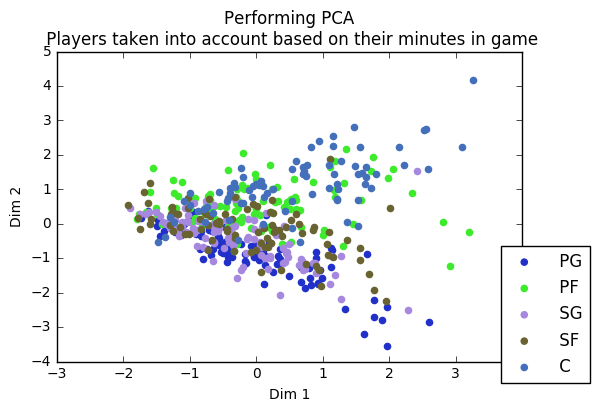

In [45]:
df_scaled = sk.preprocessing.scale(df_final)
pca = sk.decomposition.PCA(n_components=2, whiten=True)
df_red = pca.fit_transform(df_scaled)

statesN = [1,2,3,4,5]
states = [invdict[x] for x in statesN]
states

import matplotlib.patches as mpatches
pylab.title("Performing PCA\n Players taken into account based on their minutes in game")
pylab.xlabel("Dim 1")
pylab.ylabel("Dim 2")
#pylab.scatter(df_red[:, 0], df_red[:, 1], c=position_labels)

states = [invdict[x] for x in [1,2,3,4,5]]
for i,l in enumerate(states):
    x = []
    y = []
    for j,_ in enumerate(df_red[:, 0]):
        if position_labels[j] == i+1:
            x.append(df_red[j,0])
            y.append(df_red[j,1])
    pylab.scatter(x,y,label=l,color = np.random.rand(3,1) )

pylab.legend(loc='upper center', bbox_to_anchor=(1.05, .4) ,scatterpoints = 1)
pylab.show()

With no feature selection, pca gives this

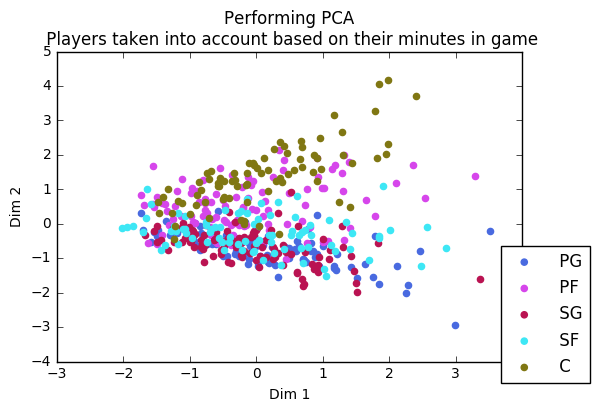

In [46]:
df_scaled = sk.preprocessing.scale(df_numVar)
pca = sk.decomposition.PCA(n_components=2, whiten=True)
df_red = pca.fit_transform(df_scaled)

statesN = [1,2,3,4,5]
states = [invdict[x] for x in statesN]
states

import matplotlib.patches as mpatches
pylab.title("Performing PCA\n Players taken into account based on their minutes in game")
pylab.xlabel("Dim 1")
pylab.ylabel("Dim 2")
#pylab.scatter(df_red[:, 0], df_red[:, 1], c=position_labels)

states = [invdict[x] for x in [1,2,3,4,5]]
for i,l in enumerate(states):
    x = []
    y = []
    for j,_ in enumerate(df_red[:, 0]):
        if position_labels[j] == i+1:
            x.append(df_red[j,0])
            y.append(df_red[j,1])
    pylab.scatter(x,y,label=l,color = np.random.rand(3,1) )

pylab.legend(loc='upper center', bbox_to_anchor=(1.05, .4) ,scatterpoints = 1)
pylab.show()

With the paper's chosen features ('REB','AST','TOV','STL','BLK','PF','PTS'), pca gives this:

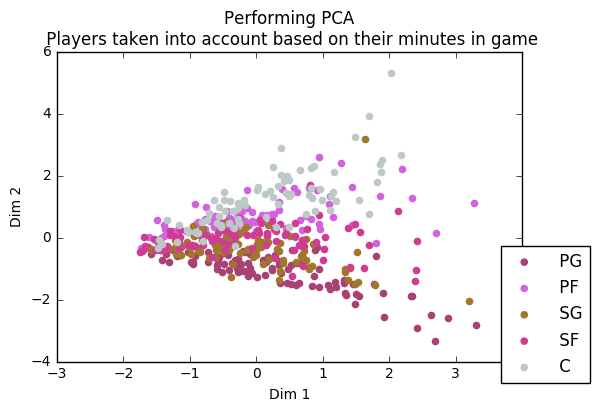

In [47]:
auxnames = ['REB','AST','TOV','STL','BLK','PF','PTS']
df_final = df_numVar[auxnames]

df_scaled = sk.preprocessing.scale(df_final)
pca = sk.decomposition.PCA(n_components=2, whiten=True)
df_red = pca.fit_transform(df_scaled)

statesN = [1,2,3,4,5]
states = [invdict[x] for x in statesN]
states

import matplotlib.patches as mpatches
pylab.title("Performing PCA\n Players taken into account based on their minutes in game")
pylab.xlabel("Dim 1")
pylab.ylabel("Dim 2")
#pylab.scatter(df_red[:, 0], df_red[:, 1], c=position_labels)

states = [invdict[x] for x in [1,2,3,4,5]]
for i,l in enumerate(states):
    x = []
    y = []
    for j,_ in enumerate(df_red[:, 0]):
        if position_labels[j] == i+1:
            x.append(df_red[j,0])
            y.append(df_red[j,1])
    pylab.scatter(x,y,label=l,color = np.random.rand(3,1) )

pylab.legend(loc='upper center', bbox_to_anchor=(1.05, .4) ,scatterpoints = 1)
pylab.show()

We decided to choose 7 features for each feature selection model as it is the amount of features used in the article we are basing our work on. After using these three feature selection methods, and comparing them with the features chosen in the article, it is hard to precisely choose which one was the best because each method has its own ranking method, but with the future clustering, we will be able to be sure of which one is best for clustering. In my opinion SPEC, MCFS and the columns chosen by Alagappan gave the best results (looking at the PCA plots), so it would be a good idea to keep them for the clustering phase to check which one is the best.

One last possible idea for the clustering is to eliminate outliers before doing it in order to improve its results. Although this might be a good idea for clustering, for our final mapper algorithm, it should not be done, as we wish to rank all players, but it might be a good idea to try to find players positions.